In [111]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
base = '/Users/jwu/Work/Dabble/MLFLUXES-main/data/'

# Useful python packages to read .mat files
# https://stackoverflow.com/questions/874461/read-mat-files-in-python

### PSD R/V (from Chris Fairall)

In [233]:
ds = xr.load_dataset(base+'fluxes_all_cruises_compilation.nc')
ds_clean = ds.dropna(dim="time", how="any", 
                     subset=['taucx','taucy','hsc','hlc','U','tsnk','ta','qa'])

<xarray.Dataset>
Dimensions:  (time: 24908)
Coordinates:
  * time     (time) datetime64[ns] 1991-11-22T11:41:00.384000 ... NaT
Data variables: (12/55)
    jdyx     (time) float64 326.5 326.6 326.6 326.7 ... 106.8 106.9 106.9 107.0
    ushp     (time) float64 5.0 1.0 1.0 1.0 1.0 4.0 ... nan nan nan nan nan nan
    U        (time) float64 8.6 7.0 7.4 7.3 6.8 5.7 ... nan nan nan nan nan nan
    dir      (time) float64 67.0 97.0 103.0 108.0 108.0 ... nan nan nan nan nan
    urel     (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    reldir   (time) float64 317.0 85.0 94.0 95.0 97.0 ... nan nan nan nan nan
    ...       ...
    rlcler   (time) float64 387.5 384.7 387.1 391.0 390.8 ... nan nan nan nan
    Rscl     (time) float64 0.0 0.0 0.0 411.8 941.5 ... nan nan nan nan nan
    rnl      (time) float64 50.84 60.7 60.7 55.47 22.12 ... nan nan nan nan nan
    hnet     (time) float64 -213.8 -200.7 -183.2 162.4 317.0 ... nan nan nan nan
    year     (time) float64 1.991e+03 1.991e+03 1.991e+03 ... nan nan nan
    pcode    (time) float64 77.0 77.0 77.0 77.0 77.0 ... nan nan nan nan nan

In [147]:
namelist = ['taucx','taucy','hsc','hlc'] + ['U','tsnk','ta','qa']

# U=x(:,3);%true wind speed, PSD sonic (m/s)
# tsnk=x(:,8);%sea snake temperature, PSD, 0.05 m depth (C)
# ta=x(:,9);%air temperature, PSD (C)
# qa=x(:,11);%air specific humidity, PSD (g/kg)

# hsc=x(:,12);%sensible heat flux, covariance (W/m^2)
# hlc=x(:,15);%latent heat flux, covariance, (W/m^2)
# taucx=x(:,18);%covariance streamwise stress (N/m^2)
# taucy=x(:,19);%covariance cross-stream stress (N/m^2)
# zu=x(:,36);%wind speed measurement height (m)
# zt=x(:,37);%air temperature measurement height (m)
# zq=x(:,38);% air humidity measurement height (m)

# U_scs=x(:,40); %true wind speed, ship anemometer (m/s)
# tsg=x(:,43);%ship water temperature, ~5 m depth, (C)
# ta_im=x(:,44);%ship air temperature (C)
# qa_im=x(:,46);%ship air specific humidity, (g/kg)
# RH=x(:,48); %PSD RH (%)

In [203]:
ds = xr.open_dataset(base+'WHOI/EUREC4A_ATOMIC_RonBrown_10min_nav_met_sea_flux_20200109-20200212_v1.3.nc')
atomic = ds.dropna(dim="obs", how="any",
                   subset=["tau_streamwise_cov","tau_bulk","wspd",'tsea','tair','qair'])
# 4002 samples

In [ ]:
# Metz =  77; Epic = 69; WHOTS = 87; STRATUS = 83; NEAQS = 78; HiWInGS = 72; GasEx = 71
# DYNAMO = 68; Calwater = 67; Capricorn = 73

1890


Text(0.5, 1.0, ' ')

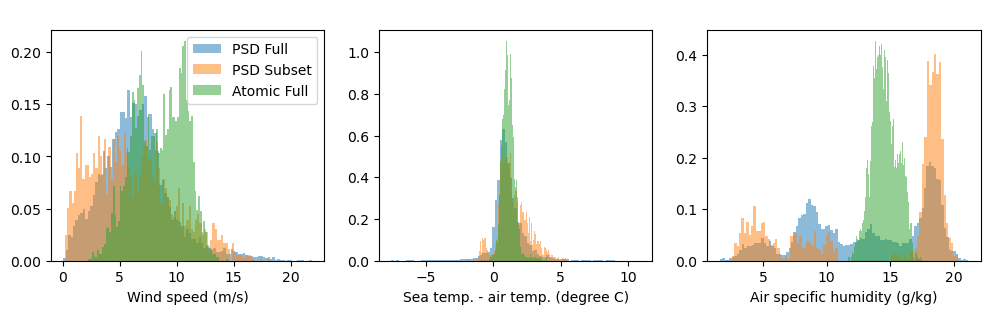

In [217]:
fig, axes = plt.subplots(1,3,figsize=[12,3])
snumber = len(ds_clean.U.values)
xr.plot.hist(ds_clean.U, bins=round(snumber/100), ax=axes[0], density=True, alpha=0.5, label='PSD Full')
# xr.plot.hist(ds_clean.tsnk, bins=round(snumber/100), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(ds_clean.tsnk-ds_clean.ta, bins=round(snumber/100), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(ds_clean.qa, bins=round(snumber/100), ax=axes[2], density=True, alpha=0.5)

ds_sub = ds_clean.where(ds_clean.pcode.isin([68,67,72,73]), drop=True)
snumber = len(ds_sub.U.values)
print(snumber)
xr.plot.hist(ds_sub.U, bins=round(snumber/20), ax=axes[0], density=True, alpha=0.5, label='PSD Subset')
# xr.plot.hist(ds_sub.tsnk, bins=round(snumber/20), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(ds_sub.tsnk-ds_sub.ta, bins=round(snumber/20), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(ds_sub.qa, bins=round(snumber/20), ax=axes[2], density=True, alpha=0.5)

snumber = len(atomic.wspd.values)
xr.plot.hist(atomic.wspd, bins=round(snumber/50), ax=axes[0], density=True, alpha=0.5, label='Atomic Full')
# xr.plot.hist(atomic.tsea, bins=round(snumber/50), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(atomic.tsea-atomic.tair, bins=round(snumber/50), ax=axes[1], density=True, alpha=0.5)
xr.plot.hist(atomic.qair, bins=round(snumber/50), ax=axes[2], density=True, alpha=0.5)

axes[0].legend()
axes[0].set_xlabel('Wind speed (m/s)'); axes[0].set_title(' ')
# axes[1].set_xlabel('Sea temperature (degree C)'); axes[1].set_title(' ')
axes[1].set_xlabel('Sea temp. - air temp. (degree C)'); axes[1].set_title(' ')
axes[2].set_xlabel('Air specific humidity (g/kg)'); axes[2].set_title(' ')
# xr.plot.hist(ds_clean.U, bins=20, ax=axes[0], alpha=0.5)
# xr.plot.hist(ds_clean.tsnk, bins=20, ax=axes[1], alpha=0.5)
# xr.plot.hist(ds_clean.ta, bins=20, ax=axes[2], alpha=0.5)
# xr.plot.hist(ds_clean.qa, bins=20, ax=axes[3], alpha=0.5)

In [246]:
from ngboost import NGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = np.hstack([np.reshape(ds_clean.U.values.astype('float32'),(-1,1)), np.reshape(ds_clean.tsnk.values.astype('float32'),(-1,1)),
               np.reshape(ds_clean.ta.values.astype('float32'),(-1,1)), np.reshape(ds_clean.qa.values.astype('float32'),(-1,1))])
Y = np.hstack([np.reshape(ds_clean.taucx.values.astype('float32'),(-1,1)), 
               np.reshape(ds_clean.taub.values.astype('float32'),(-1,1))])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

''' https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor

'''
learner = DecisionTreeRegressor(criterion='friedman_mse', max_depth=2)
# learner = GaussianProcessRegressor()

ngb = NGBRegressor(Base=learner, n_estimators=2000, learning_rate=0.01)

ngb.fit(X_train, Y_train[:,0])
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

[iter 0] loss=-0.7699 val_loss=0.0000 scale=1.0000 norm=0.7120
[iter 100] loss=-1.6992 val_loss=0.0000 scale=2.0000 norm=0.9165
[iter 200] loss=-1.9627 val_loss=0.0000 scale=2.0000 norm=1.0400
[iter 300] loss=-2.0368 val_loss=0.0000 scale=2.0000 norm=1.1067
[iter 400] loss=-2.0668 val_loss=0.0000 scale=1.0000 norm=0.5595
[iter 500] loss=-2.0872 val_loss=0.0000 scale=1.0000 norm=0.5613
[iter 600] loss=-2.1035 val_loss=0.0000 scale=1.0000 norm=0.5616
[iter 700] loss=-2.1152 val_loss=0.0000 scale=1.0000 norm=0.5611
[iter 800] loss=-2.1245 val_loss=0.0000 scale=1.0000 norm=0.5600
[iter 900] loss=-2.1339 val_loss=0.0000 scale=1.0000 norm=0.5579
[iter 1000] loss=-2.1431 val_loss=0.0000 scale=1.0000 norm=0.5553
[iter 1100] loss=-2.1497 val_loss=0.0000 scale=1.0000 norm=0.5550
[iter 1200] loss=-2.1556 val_loss=0.0000 scale=1.0000 norm=0.5542
[iter 1300] loss=-2.1629 val_loss=0.0000 scale=1.0000 norm=0.5519
[iter 1400] loss=-2.1689 val_loss=0.0000 scale=2.0000 norm=1.1014
[iter 1500] loss=-2.17

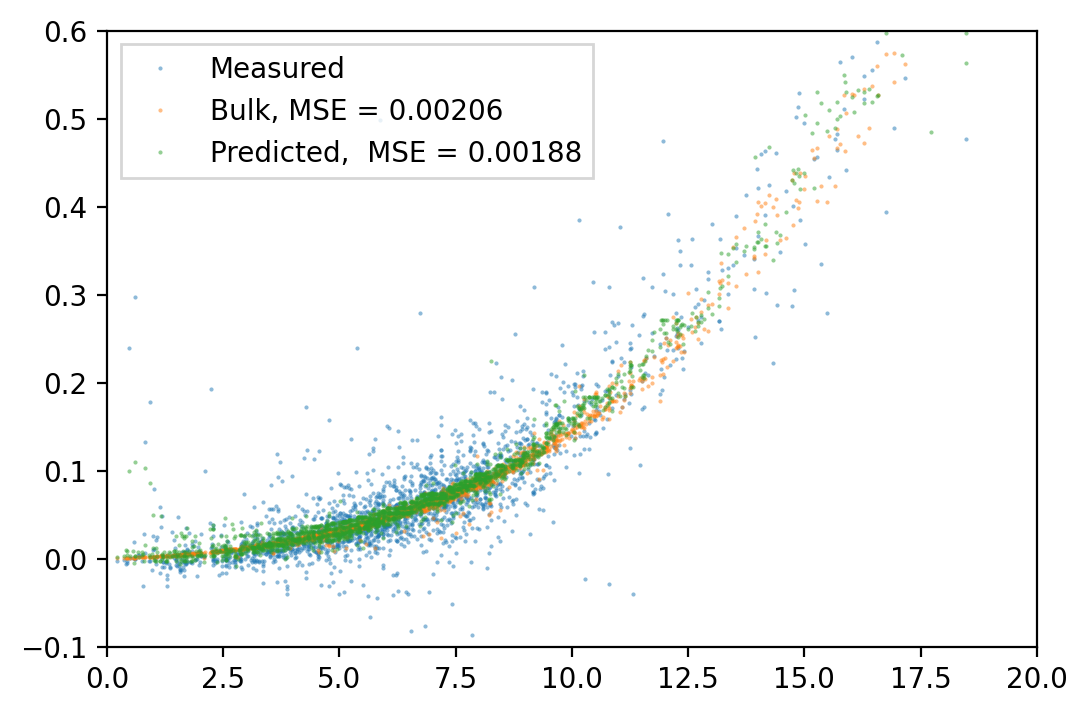

In [259]:
fig = plt.figure(figsize=[6,4], dpi=200)
# plt.plot(X_test[:,0],Y_preds-Y_dists.var**0.5,'.', markersize=0.5)
# plt.plot(X_test[:,0],Y_preds+Y_dists.var**0.5,'.', markersize=0.5)
MSE_bulk = np.mean((Y_test[:,1]-Y_test[:,0])**2)
MSE_pred = np.mean((Y_preds-Y_test[:,0])**2)
plt.plot(X_test[:,0],Y_test[:,0],'.', markersize=1, alpha=0.5, label='Measured')
plt.plot(X_test[:,0],Y_test[:,1],'.', markersize=1, alpha=0.5, label='Bulk, MSE = %.5f' %MSE_bulk)
plt.plot(X_test[:,0],Y_preds,'.', markersize=1, alpha=0.5, label='Predicted,  MSE = %.5f' %MSE_pred)

plt.xlim([0,20]); plt.ylim([-0.1,0.6])
plt.legend(fancybox=False)

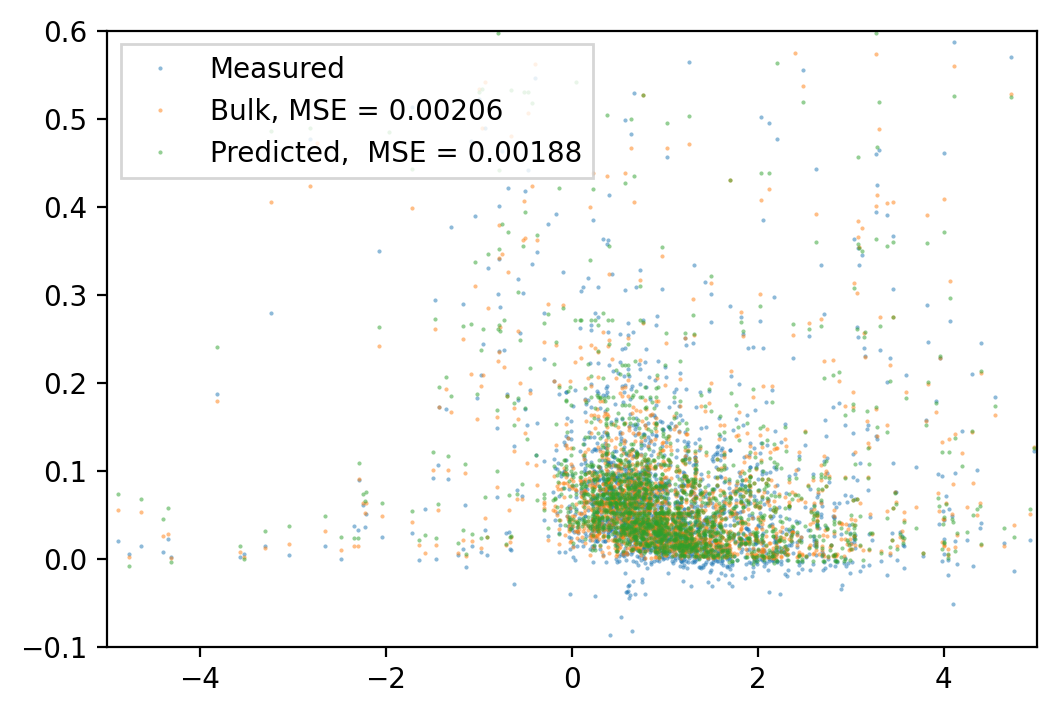

In [260]:
fig = plt.figure(figsize=[6,4], dpi=200)
plt.plot(X_test[:,1]-X_test[:,2],Y_test[:,0],'.', markersize=1, alpha=0.5, label='Measured')
plt.plot(X_test[:,1]-X_test[:,2],Y_test[:,1],'.', markersize=1, alpha=0.5, label='Bulk, MSE = %.5f' %MSE_bulk)
plt.plot(X_test[:,1]-X_test[:,2],Y_preds,'.', markersize=1, alpha=0.5, label='Predicted,  MSE = %.5f' %MSE_pred)

plt.xlim([-5,5]); plt.ylim([-0.1,0.6])
plt.legend(fancybox=False)

In [358]:
from ngboost import NGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


U = ds_clean.U.values.astype('float32')
mean1 = np.mean(U)
std1 = np.std(U)
tempdiff = ds_clean.tsnk.values.astype('float32')-ds_clean.ta.values.astype('float32')
std2 = np.std(tempdiff)
hsc = ds_clean.hsc.values.astype('float32')
stdout = np.std(hsc)
max3 = np.max(ds_clean.qa.values.astype('float32'))
zu = ds_clean.zu.values.astype('float32'); max4 = np.max(zu)
zt = ds_clean.zt.values.astype('float32'); max5 = np.max(zt)
zq = ds_clean.zq.values.astype('float32'); max6 = np.max(zq)
X = np.hstack([np.reshape((U-mean1)/std1,(-1,1)), 
               np.reshape(tempdiff/std2,(-1,1)), 
               np.reshape(ds_clean.qa.values.astype('float32')/max3,(-1,1)),
               np.reshape(zu/max4,(-1,1)),
               np.reshape(zt/max5,(-1,1)),
               np.reshape(zq/max6,(-1,1))])
Y = np.hstack([np.reshape(hsc/stdout,(-1,1)), 
               np.reshape(ds_clean.hsb.values.astype('float32')/stdout,(-1,1))])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

''' https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor

'''
learner = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)
# learner = GaussianProcessRegressor()

ngb = NGBRegressor(Base=learner, n_estimators=800, learning_rate=0.01)

ngb.fit(X_train, Y_train[:,0])

[iter 0] loss=1.3895 val_loss=0.0000 scale=1.0000 norm=0.9915


/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
  self.var = self.scale**2
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/ngboost/distns/normal.py:71: RuntimeWarning: overflow encountered in square
  self.var = self.scale**2
/Users/jwu/miniconda3/envs/mlflux/lib/python3.11/site-packages/ngboost/distns/normal.py:70: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])


[iter 100] loss=0.4062 val_loss=0.0000 scale=2.0000 norm=1.1638
[iter 200] loss=0.0698 val_loss=0.0000 scale=2.0000 norm=1.1364
[iter 300] loss=-0.0399 val_loss=0.0000 scale=0.5000 norm=0.2889
[iter 400] loss=-0.0825 val_loss=0.0000 scale=2.0000 norm=1.1684
[iter 500] loss=-0.1105 val_loss=0.0000 scale=1.0000 norm=0.5861
[iter 600] loss=-0.1305 val_loss=0.0000 scale=2.0000 norm=1.1725
[iter 700] loss=-0.1497 val_loss=0.0000 scale=1.0000 norm=0.5848


NGBRegressor(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=4),
             n_estimators=800,
             random_state=RandomState(MT19937) at 0x10A263A40)

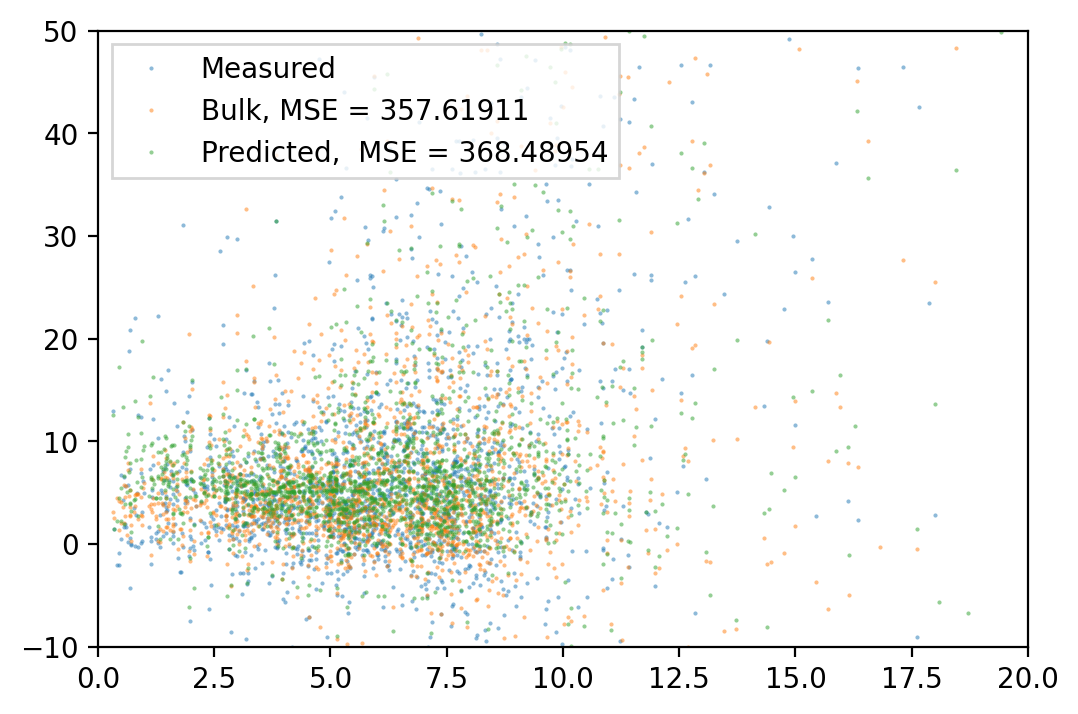

In [359]:
Y_preds = ngb.predict(X_test)*stdout
Y_dists = ngb.pred_dist(X_test)

fig = plt.figure(figsize=[6,4], dpi=200)
MSE_bulk = np.mean((Y_test[:,1]*stdout-Y_test[:,0]*stdout)**2)
MSE_pred = np.mean((Y_preds-Y_test[:,0]*stdout)**2)
plt.plot(X_test[:,0]*std1+mean1,Y_test[:,0]*stdout,'.', markersize=1, alpha=0.5, label='Measured')
plt.plot(X_test[:,0]*std1+mean1,Y_test[:,1]*stdout,'.', markersize=1, alpha=0.5, label='Bulk, MSE = %.5f' %MSE_bulk)
plt.plot(X_test[:,0]*std1+mean1,Y_preds,'.', markersize=1, alpha=0.5, label='Predicted,  MSE = %.5f' %MSE_pred)

plt.xlim([0,20]) 
plt.ylim([-10,50])
plt.legend(fancybox=False)

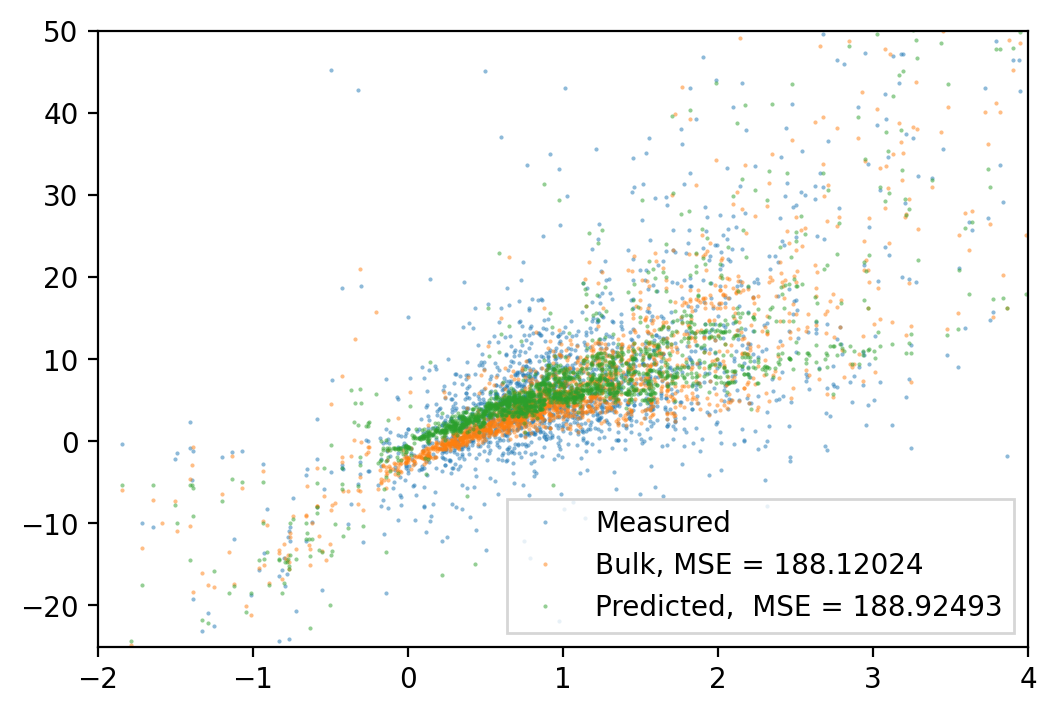

In [347]:
fig = plt.figure(figsize=[6,4], dpi=200)
plt.plot(X_test[:,1]*std2,Y_test[:,0]*stdout,'.', markersize=1, alpha=0.5, label='Measured')
plt.plot(X_test[:,1]*std2,Y_test[:,1]*stdout,'.', markersize=1, alpha=0.5, label='Bulk, MSE = %.5f' %MSE_bulk)
plt.plot(X_test[:,1]*std2,Y_preds,'.', markersize=1, alpha=0.5, label='Predicted,  MSE = %.5f' %MSE_pred)

plt.xlim([-2,4]); 
plt.ylim([-25,50]) 
plt.legend(fancybox=False)

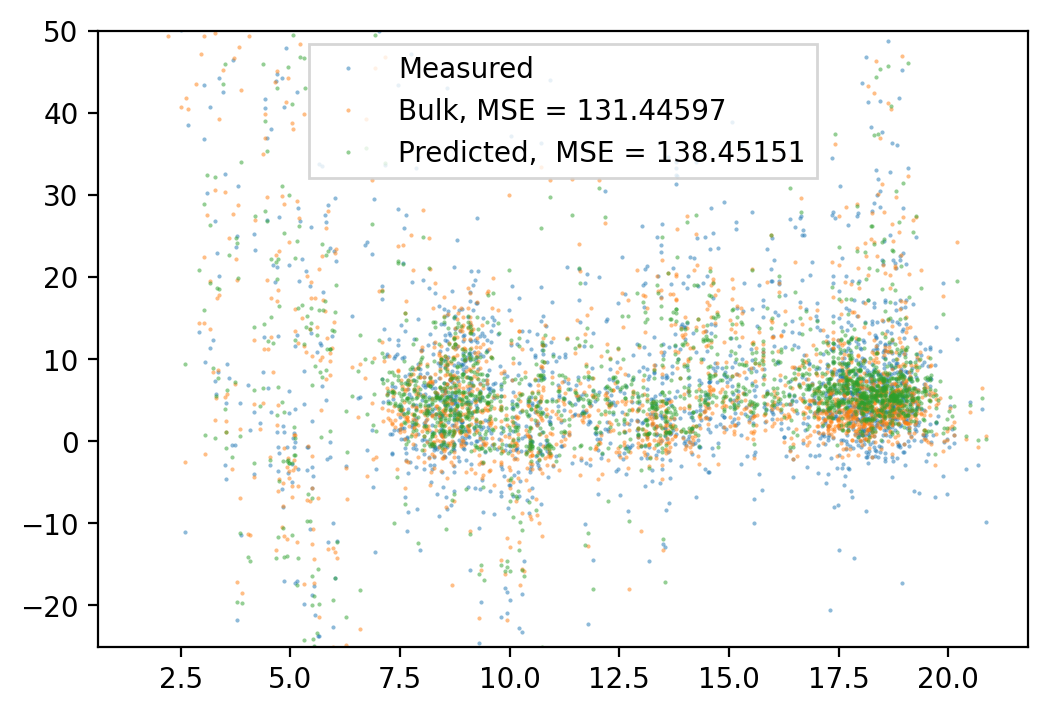

In [330]:
fig = plt.figure(figsize=[6,4], dpi=200)
plt.plot(X_test[:,2]*max3,Y_test[:,0]*stdout,'.', markersize=1, alpha=0.5, label='Measured')
plt.plot(X_test[:,2]*max3,Y_test[:,1]*stdout,'.', markersize=1, alpha=0.5, label='Bulk, MSE = %.5f' %MSE_bulk)
plt.plot(X_test[:,2]*max3,Y_preds,'.', markersize=1, alpha=0.5, label='Predicted,  MSE = %.5f' %MSE_pred)

# plt.xlim([-2,4]); 
plt.ylim([-25,50]) 
plt.legend(fancybox=False)

In [368]:
from ngboost import NGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


U = ds_clean.U.values.astype('float32')
mean1 = np.mean(U)
std1 = np.std(U)
tempdiff = ds_clean.tsnk.values.astype('float32')-ds_clean.ta.values.astype('float32')
std2 = np.std(tempdiff)
hlc = ds_clean.hlc.values.astype('float32')
stdout = np.std(hlc)
max3 = np.max(ds_clean.qa.values.astype('float32'))
zu = ds_clean.zu.values.astype('float32'); max4 = np.max(zu)
zt = ds_clean.zt.values.astype('float32'); max5 = np.max(zt)
zq = ds_clean.zq.values.astype('float32'); max6 = np.max(zq)
X = np.hstack([np.reshape((U-mean1)/std1,(-1,1)), 
               np.reshape(tempdiff/std2,(-1,1)), 
               np.reshape(ds_clean.qa.values.astype('float32')/max3,(-1,1)),
               np.reshape(zu/max4,(-1,1)),
               np.reshape(zt/max5,(-1,1)),
               np.reshape(zq/max6,(-1,1))])
Y = np.hstack([np.reshape(hlc/stdout,(-1,1)), 
               np.reshape(ds_clean.hlb.values.astype('float32')/stdout,(-1,1))])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

''' https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor

'''
learner = DecisionTreeRegressor(criterion='friedman_mse', max_depth=4)
# learner = GaussianProcessRegressor()

ngb = NGBRegressor(Base=learner, n_estimators=800, learning_rate=0.01)

ngb.fit(X_train, Y_train[:,0])

[iter 0] loss=1.4195 val_loss=0.0000 scale=1.0000 norm=1.0003
[iter 100] loss=1.0740 val_loss=0.0000 scale=2.0000 norm=1.5585
[iter 200] loss=0.9133 val_loss=0.0000 scale=1.0000 norm=0.7379
[iter 300] loss=0.8442 val_loss=0.0000 scale=1.0000 norm=0.7284
[iter 400] loss=0.8015 val_loss=0.0000 scale=1.0000 norm=0.7269
[iter 500] loss=0.7725 val_loss=0.0000 scale=1.0000 norm=0.7251
[iter 600] loss=0.7495 val_loss=0.0000 scale=1.0000 norm=0.7208
[iter 700] loss=0.7306 val_loss=0.0000 scale=1.0000 norm=0.7163


NGBRegressor(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=4),
             n_estimators=800,
             random_state=RandomState(MT19937) at 0x10A263A40)

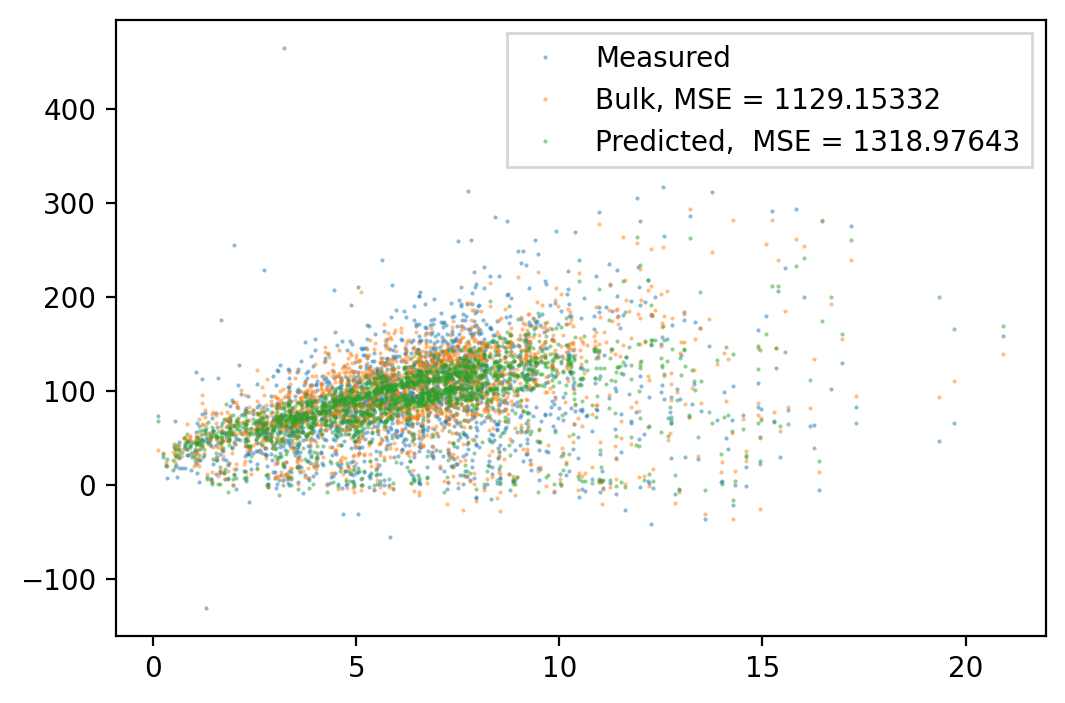

In [369]:
Y_preds = ngb.predict(X_test)*stdout
Y_dists = ngb.pred_dist(X_test)

fig = plt.figure(figsize=[6,4], dpi=200)
MSE_bulk = np.mean((Y_test[:,1]*stdout-Y_test[:,0]*stdout)**2)
MSE_pred = np.mean((Y_preds-Y_test[:,0]*stdout)**2)
plt.plot(X_test[:,0]*std1+mean1,Y_test[:,0]*stdout,'.', markersize=1, alpha=0.5, label='Measured')
plt.plot(X_test[:,0]*std1+mean1,Y_test[:,1]*stdout,'.', markersize=1, alpha=0.5, label='Bulk, MSE = %.5f' %MSE_bulk)
plt.plot(X_test[:,0]*std1+mean1,Y_preds,'.', markersize=1, alpha=0.5, label='Predicted,  MSE = %.5f' %MSE_pred)

# plt.xlim([0,20]) 
# plt.ylim([-10,50])
plt.legend(fancybox=False)

Text(0.5, 1.0, ' ')

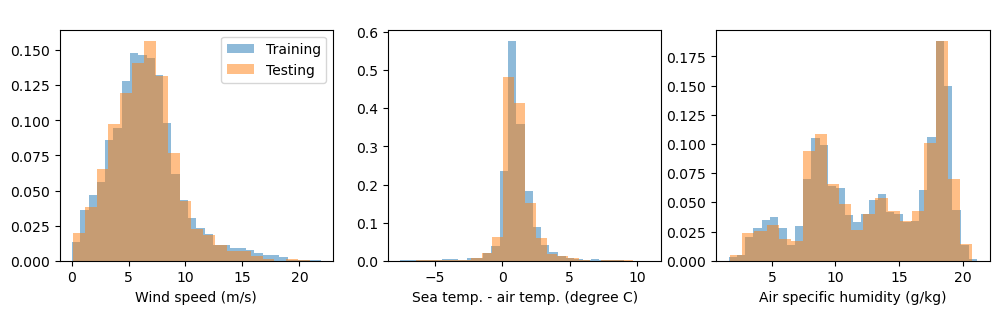

In [377]:
fig, axes = plt.subplots(1,3,figsize=[12,3])
snumber = len(ds_clean.U.values)
axes[0].hist(X_train[:,0]*std1+mean1, bins=30, density=True, alpha=0.5, label='Training')
axes[1].hist(X_train[:,1]*std2, bins=30, density=True, alpha=0.5)
axes[2].hist(X_train[:,2]*max3, bins=30, density=True, alpha=0.5)

axes[0].hist(X_test[:,0]*std1+mean1, bins=20, density=True, alpha=0.5, label='Testing')
axes[1].hist(X_test[:,1]*std2, bins=20, density=True, alpha=0.5)
axes[2].hist(X_test[:,2]*max3, bins=20, density=True, alpha=0.5)

axes[0].legend()
axes[0].set_xlabel('Wind speed (m/s)'); axes[0].set_title(' ')
axes[1].set_xlabel('Sea temp. - air temp. (degree C)'); axes[1].set_title(' ')
axes[2].set_xlabel('Air specific humidity (g/kg)'); axes[2].set_title(' ')

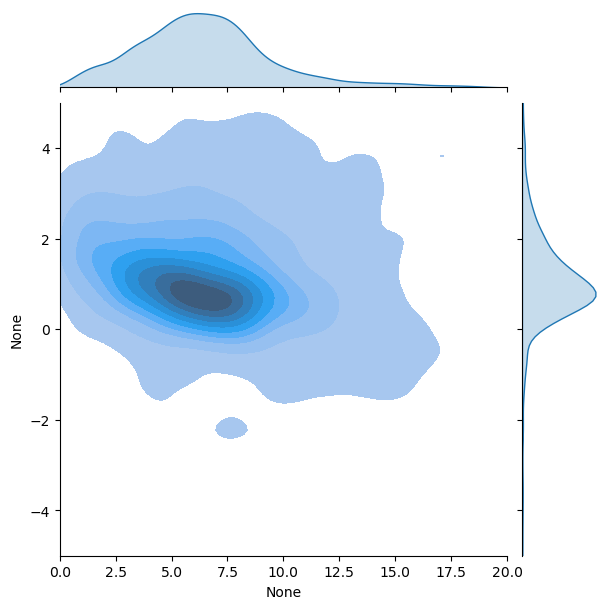

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=X_train[:,0]*std1+mean1, y=X_train[:,1]*std2, kind='kde', xlim=[0,20],
              ylim=[-5,5], fill=True)



Text(0.5, 1.0, ' ')

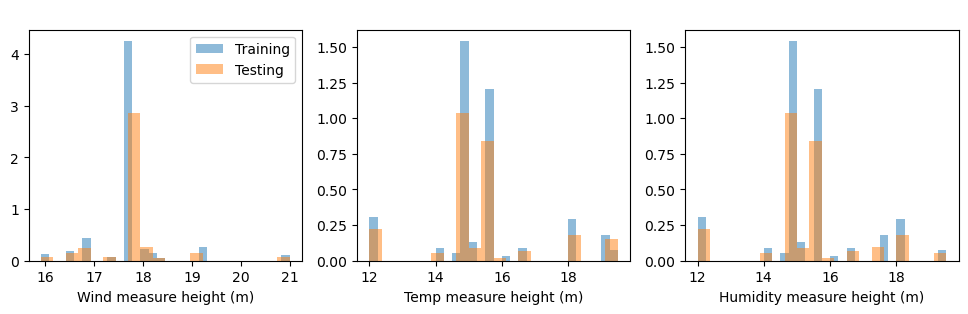

In [380]:
fig, axes = plt.subplots(1,3,figsize=[12,3])
snumber = len(ds_clean.U.values)
axes[0].hist(X_train[:,3]*max4, bins=30, density=True, alpha=0.5, label='Training')
axes[1].hist(X_train[:,4]*max5, bins=30, density=True, alpha=0.5)
axes[2].hist(X_train[:,5]*max6, bins=30, density=True, alpha=0.5)

axes[0].hist(X_test[:,3]*max4, bins=20, density=True, alpha=0.5, label='Testing')
axes[1].hist(X_test[:,4]*max5, bins=20, density=True, alpha=0.5)
axes[2].hist(X_test[:,5]*max6, bins=20, density=True, alpha=0.5)

axes[0].legend()
axes[0].set_xlabel('Wind measure height (m)'); axes[0].set_title(' ')
axes[1].set_xlabel('Temp measure height (m)'); axes[1].set_title(' ')
axes[2].set_xlabel('Humidity measure height (m)'); axes[2].set_title(' ')

Text(0.5, 1.0, ' ')

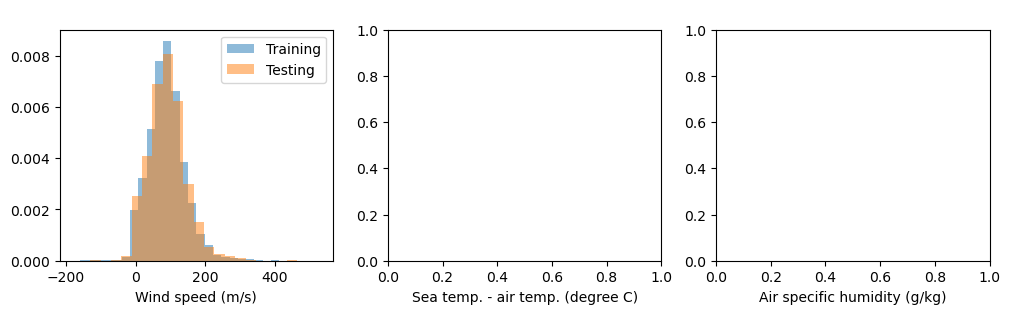

In [378]:
fig, axes = plt.subplots(1,3,figsize=[12,3])
snumber = len(ds_clean.U.values)
axes[0].hist(Y_train[:,0]*stdout, bins=30, density=True, alpha=0.5, label='Training')
# axes[1].hist(X_train[:,1]*std2, bins=30, density=True, alpha=0.5)
# axes[2].hist(X_train[:,2]*max3, bins=30, density=True, alpha=0.5)

axes[0].hist(Y_test[:,0]*stdout, bins=20, density=True, alpha=0.5, label='Testing')
# axes[1].hist(X_test[:,1]*std2, bins=20, density=True, alpha=0.5)
# axes[2].hist(X_test[:,2]*max3, bins=20, density=True, alpha=0.5)

axes[0].legend()
axes[0].set_xlabel('Wind speed (m/s)'); axes[0].set_title(' ')
axes[1].set_xlabel('Sea temp. - air temp. (degree C)'); axes[1].set_title(' ')
axes[2].set_xlabel('Air specific humidity (g/kg)'); axes[2].set_title(' ')

### ATOMIC (from Cesar Sauvage)

In [2]:
ds = xr.open_dataset(base+'WHOI/EUREC4A_ATOMIC_RonBrown_10min_nav_met_sea_flux_20200109-20200212_v1.3.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:                           (trajectory: 1, obs: 5040)
Coordinates:
  * trajectory                        (trajectory) int32 -2147483647
    time                              (obs, trajectory) datetime64[ns] ...
    lat                               (obs, trajectory) float64 ...
    lon                               (obs, trajectory) float64 ...
    zu                                (obs, trajectory) float64 ...
    ztq                               (obs, trajectory) float64 ...
    zsea                              (obs, trajectory) float64 ...
    zu_ship                           (obs, trajectory) float64 ...
    ztq_ship                          (obs, trajectory) float64 ...
    zsea_ship                         (obs, trajectory) float64 ...
Dimensions without coordinates: obs
Data variables: (12/97)
    RonBrown                          (trajectory) |S1 ...
    crs                               float64 ...
    rain_instrument                   (trajectory) |S1 ...
    shortwave_radiation_instrument_1  (trajectory) |S1 ...
    shortwave_radiation_instrument_2  (trajectory) |S1 ...
    longwave_radiation_instrument_1   (trajectory) |S1 ...
    ...                                ...
    ch                                (obs, trajectory) float64 ...
    evap                              (obs, trajectory) float64 ...
    rough_u                           (obs, trajectory) float64 ...
    rough_t                           (obs, trajectory) float64 ...
    rough_q                           (obs, trajectory) float64 ...
    gust                              (obs, trajectory) float64 ...
Attributes: (12/33)
    title:                     ATOMIC (Atlantic Tradewind Ocean Atmosphere Me...
    summary:                   The data come from two sources, the NOAA PSL s...
    keywords:                  Earth Science > Atmosphere > Atmospheric Press...
    keywords_vocabulary:       GCMD Earth Science Keywords. Version 8.6
    comment:                   The PSL data (variables without suffix) should...
    instrument:                In Situ Instruments from NOAA PSL and the perm...
    ...                        ...
    cdm_data_type:             Trajectory
    date_created:              2021-03-30T16:13:03Z
    date_modified:             2021-03-30T16:13:03Z
    standard_name_vocabulary:  CF Standard Name Table v41
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3

(0.0, 1.0)

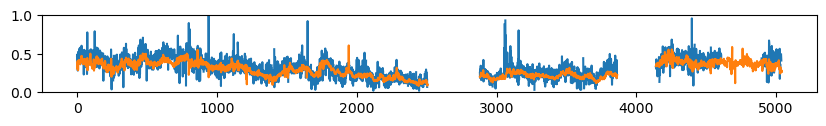

In [12]:
fig = plt.figure(figsize=[10,1])
plt.plot(ds.tau_streamwise_cov**0.5)
plt.plot(ds.ustar)
plt.ylim([0,1])


In [ ]:
fig = plt.figure(figsize=[10,1])
plt.plot(ds.tau_streamwise_cov**0.5)
plt.plot(ds.ustar)
plt.ylim([0,1])

In [4]:
xr.open_dataset(base+'WHOI/EUREC4A_ATOMIC_RonBrown_ROSR_sea_skin_temp_20200109_20200126_v1.3.nc')

<xarray.Dataset>
Dimensions:  (time: 4897)
Coordinates:
  * time     (time) timedelta64[ns] 8 days 00:00:00 ... 25 days 00:00:00
Data variables:
    lat      (time) float64 ...
    lon      (time) float64 ...
    tskin    (time) float64 ...
Attributes: (12/35)
    title:                                     ROSR Level 2 sea surface skin/...
    project:                                   ATOMIC
    platform:                                  R/V Ronald H. Brown
    instrument:                                ROSR
    version:                                   1.3
    summary:                                   ROSR ship-based skin SST data
    ...                                        ...
    instrument_vertical_angles:                Radiometer makes measurements ...
    keywords:                                  Oceans > Ocean Temperature > S...
    keywords_vocabulary:                       NASA Global Change Master Dire...
    standard_name_vocabulary:                  NetCDF Climate and Forecast (C...
    geospatial_lat_units:                      degree_north
    geospatial_lon_units:                      degree_east

### Bazzard Bay Tower (from Seth Zippel)

In [381]:
import scipy.io as spio
import mat73
data_dict = mat73.loadmat(base + 'Zippel/zippel2024.mat')
# mat = spio.loadmat(base + 'zippel2024.mat', squeeze_me=True)

In [383]:
x = data_dict['mNode_20m']['u_bar'][0]
x = x[~np.isnan(x)]
x.shape

(3585,)

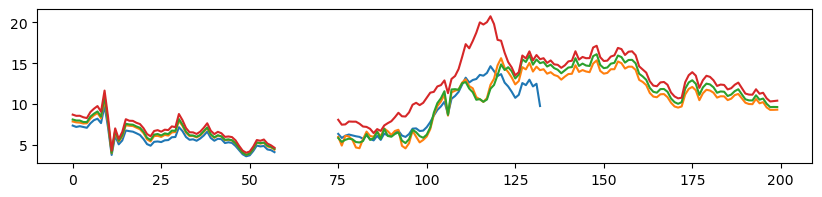

In [44]:
fig = plt.figure(figsize=[10,2])
plt.plot(data_dict['mNode_20m']['u_bar'][0][400:600])
plt.plot(data_dict['mNode_20m']['u_bar'][1][400:600])
plt.plot(data_dict['mNode_20m']['u_bar'][2][400:600])
plt.plot(data_dict['mNode_20m']['u_bar'][3][400:600])

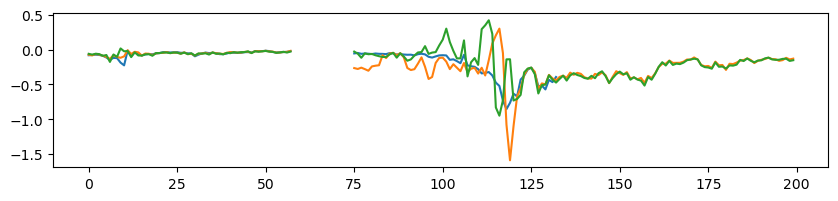

In [43]:
fig = plt.figure(figsize=[10,2])
plt.plot(data_dict['mNode_20m']['uw_bar'][0][400:600])
plt.plot(data_dict['mNode_20m']['uw_bar'][1][400:600])
plt.plot(data_dict['mNode_20m']['uw_bar'][2][400:600])
# plt.plot(data_dict['mNode_20m']['vw_bar'][0][0:1000])

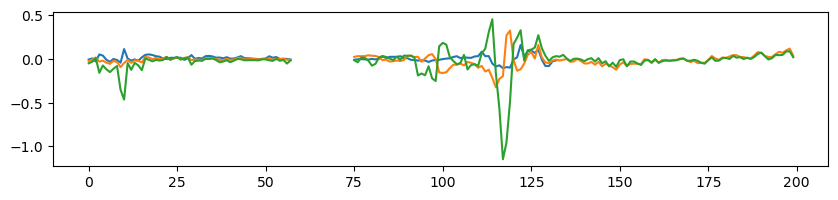

In [45]:
fig = plt.figure(figsize=[10,2])
plt.plot(data_dict['mNode_20m']['vw_bar'][0][400:600])
plt.plot(data_dict['mNode_20m']['vw_bar'][1][400:600])
plt.plot(data_dict['mNode_20m']['vw_bar'][2][400:600])
# plt.plot(data_dict['mNode_20m']['vw_bar'][0][0:1000])

### FLIP (from Luc Lenain)

HiRes: 397 samples from 2 boom heights in _ASIFLUX_WAVE_1_DESPIKED_SOFT_FCUT20_20130625.mat_ and _ASIFLUX_WAVE_2_DESPIKED_SOFT_FCUT20_20130625.mat_ separately.

In [135]:
''' https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html
    By default SciPy reads MATLAB structs as structured NumPy arrays where the 
    dtype fields are of type object and the names correspond to the MATLAB struct field names.'''
data_dict = spio.loadmat(base + 'FLIP/HiRes2010/ASIFLUX_WAVE_1_DESPIKED_SOFT_FCUT20_20130625.mat',)
print(data_dict['EC_CSAT1'][0,0].dtype.names)

('Computed_On', 'time', 'z', 'mUxyz', 'mUxy', 'mUx', 'mUy', 'mUz', 'COV_UxUx', 'COV_UyUy', 'COV_UzUz', 'COV_UxyUxy', 'COV_UxUy', 'COV_UxUz', 'COV_UyUz', 'COV_UxUx_ATS', 'COV_UyUy_ATS', 'COV_UzUz_ATS', 'COV_UxyUxy_ATS', 'COV_UxUy_ATS', 'COV_UxUz_ATS', 'COV_UyUz_ATS', 'ustar', 'tau_x', 'tau_y', 'tau', 'zon', 'rho_a', 'T_hmp', 'Ts', 'Rs_downwell', 'Rs_upwell', 'Rir_downwell', 'Rir_upwell', 'P0', 'P', 'q0', 'theta0', 'Ts_hmp', 'theta_hmp', 'theta_virtual_hmp', 'q_hmp', 'COV_Ts_hmp', 'COV_theta_hmp', 'COV_theta_virtual_hmp', 'COV_q_hmp', 'COV_Uz_Ts_hmp', 'COV_Ux_theta_hmp', 'COV_Uy_theta_hmp', 'COV_Uz_theta_hmp', 'COV_Uz_theta_virtual_hmp', 'COV_Uz_q_hmp', 'Latent_Heat_Flux', 'Sensible_Heat_Flux', 'theta_star_hmp', 'q_star_hmp', 'L_hmp', 'ZoverL_hmp', 'psim_hmp', 'psit_hmp', 'psiq_hmp', 'zo_hmp', 'zot_hmp', 'zoq_hmp', 'U10_hmp', 'q10_hmp', 'theta10_hmp', 'L10_hmp', 'CD_hmp', 'CT_hmp', 'CQ_hmp', 'U10n_hmp', 'q10n_hmp', 'theta10n_hmp', 'L10n_hmp', 'CD10n_hmp', 'CT10n_hmp', 'CQ10n_hmp', 'Ts_li

In [136]:
x = data_dict['EC_CSAT1'][0,0][1]
x.shape

(1, 397)

397
390
397
390


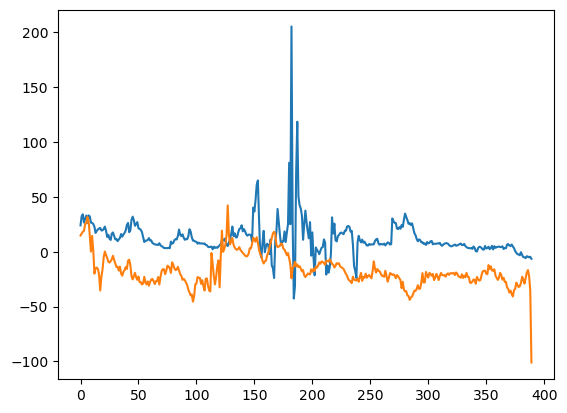

In [122]:
x = data_dict['EC_CSAT1'][0,0]['Latent_Heat_Flux'][0]
print(len(x))
x = x[~np.isnan(x)]
x = x[np.where(abs(x)<1e+10)] # Don't know why there are some huge values
print(len(x))
x.max()

plt.plot(x)

x = data_dict['EC_CSAT1'][0,0]['Sensible_Heat_Flux'][0]
print(len(x))
x = x[~np.isnan(x)]
x = x[np.where(abs(x)<1e+10)] # Don't know why there are some huge values
print(len(x))
x.max()

plt.plot(x)




SoCal: 581 points in _ASIFLUX_WINDFRAME_W0_UWcorrected_nfft36000_RAW_with_TSC.mat_

In [142]:
SoCal = spio.loadmat(base + 'FLIP/SoCal2013/ASIFLUX_WINDFRAME_W0_UWcorrected_nfft36000_RAW_with_TSC.mat',)
print(SoCal['EC_FAST_1'][0,0].dtype.names)

('Computed_On', 'time', 'T', 'T_virtual', 'theta', 'theta_virtual', 'q', 'COV_T_T', 'COV_theta_theta', 'COV_theta_theta_virtual', 'COV_q_q', 'COV_U_theta', 'COV_V_theta', 'COV_W_theta', 'COV_W_theta_virtual', 'COV_W_T', 'COV_W_Q', 'LatentHeatFlux', 'SensibleHeatFlux', 'theta_star', 'q_star', 'L1', 'L2', 'ZoverL1', 'ZoverL2', 'psim', 'psit', 'psiq', 'zo', 'zot', 'zoq', 'U10', 'q10', 'theta10', 'L10', 'CD10', 'CT10', 'CQ10', 'U10n', 'q10n', 'theta10n', 'L10n', 'CD10n', 'CT10n', 'CQ10n')


In [144]:
SoCal['EC_FAST_1'][0,0]['T'].shape

(1, 581)